In [75]:
import warnings

In [76]:
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

In [3]:
X_data, Y_data = StandardScaler().fit_transform(load_boston().data), load_boston().target

# SGD

In [ ]:
for j in range(1, (iterations+1)):

    # the variable "should_break" is there to check the convergence and if it has converged, we can break out of the loop
    if j == 1:
        should_break = False

    if should_break: # should_break will only be true when the difference between current and previous weight is less than "tol"
        break
    
    for x, y in zip(X_data, Y_data): # taking each datapoint and calculating its derivatives
        
        x = x.reshape(13, 1)

        der_w = -2 * x * (y - (np.dot(w.T, x) + w0)) + (2 * lam_value * w) # derivative with respect to weight vector
        der_w0 = -2 * (y - (np.dot(w.T, x) + w0)) # derivative with respect to bias term

        prev_w, prev_w0 = w, w0 # storing the current w and w0 before updating them

        w = w - (.01/j) * der_w # updating weight vector
        w0 = w0 - (.01/j) * der_w0 # updating bias term


        a = abs(w - prev_w).reshape(1,13) < (np.array([tol] * 13)) 

        # "a" will be of shape(1,13) and will have all boolean values
        # if the difference between previous weight and current weight is less than tolerance, it will be "True" in that position
        # similarly for all values, there will be a coresponding boolean value in the array "a"


        if a.all(): 
            should_break = True
            break

In [5]:
class SGD():
    
    def __init__(self,X_data, Y_data, w, w0, tol, iterations, lam):
        
        self.X_data = X_data
        self.Y_data = Y_data
        self.w = w
        self.w0 = w0
        self.tol = tol
        self.iterations = iterations
        self.lam = lam
        self.cross_val_values = dict()
        self.converge = dict()
        self.all_w = dict()
        self.all_w0 = dict()
    
    def cross_validate(self):
        
        iterations = self.iterations
        X_data, Y_data = self.X_data, self.Y_data
        w, w0, tol, lam = self.w, self.w0, self.tol, self.lam
        
        for lam_value in lam:
            
            for j in range(1, (iterations+1)):

                # the variable "should_break" is there to check the convergence and if it has converged, we can break out of the loop
                if j == 1:
                    should_break = False

                if should_break: # should_break will only be true when the difference between current and previous weight is less than "tol"
                    break

                for x, y in zip(X_data, Y_data): # taking each datapoint and calculating its derivatives

                    x = x.reshape(13, 1)

                    der_w = -2 * x * (y - (np.dot(w.T, x) + w0)) + (2 * lam_value * w) # derivative with respect to weight vector
                    der_w0 = -2 * (y - (np.dot(w.T, x) + w0)) # derivative with respect to bias term

                    prev_w, prev_w0 = w, w0 # storing the current w and w0 before updating them

                    w = w - (.01/j) * der_w # updating weight vector
                    w0 = w0 - (.01/j) * der_w0 # updating bias term


                    a = abs(w - prev_w).reshape(1,13) < (np.array([tol] * 13)) 

                    # "a" will be of shape(1,13) and will have all boolean values
                    # if the difference between previous weight and current weight is less than tolerance, it will be "True" in that position
                    # similarly for all values, there will be a coresponding boolean value in the array "a"


                    if a.all(): 
                        should_break = True
                        break

                    # a.all() will return a boolean. if all the values in "a" are True, only then the "if statement" will be executed
                    # in this case, "a" will be all "True" if difference between all elements in previous and current weight is less than tol
        
                # calculating mean squared error and storing the error for each value of lambda in a dictionary
                tot_error = np.array([])

                for x, y in zip(X_data, Y_data):
                    pred = (np.dot(w.T, x) + w0)
                    error = (y - pred) ** 2
                    tot_error = np.append(tot_error, error)
                    self.cross_val_values[lam_value] = tot_error.mean()

                # calculating the number of iterations took for convergence
                if j == iterations:
                    self.converge[lam_value] = "did not converge"
                else:
                    self.converge[lam_value] = f'Took {j} iterations of the whole datset to converge'
                    
                
                    
       # calculating the optimal lambda based on mean squared error             
        for a,b in zip(self.cross_val_values.keys(), self.cross_val_values.values()):
            if b == min(self.cross_val_values.values()):
                self.best_lambda = a
                self.mean_squared_error = b
            print(f'{a}: {b}, {self.converge[a]}')
         
        # plotting lambda vs mean squared error
        fig = plt.figure(figsize = (9,6))
        ax = fig.add_subplot(1,1,1)
        plt.plot(self.cross_val_values.keys(), self.cross_val_values.values(), "-*")
        plt.xscale("log")
        plt.xlabel("Lambda (Log Scale)", fontsize = 12)
        plt.ylabel("Mean Squared Error", fontsize = 12)
        for tick_x, tick_y in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
            tick_x.label.set_fontsize(12)
            tick_y.label.set_fontsize(12)
            
        plt.show()
        
        print(f'Best value of lambda is {self.best_lambda}')
                
            
    
    def fit_and_test(self, lambd):
        
        iterations = self.iterations
        X_data, Y_data = self.X_data, self.Y_data
        w, w0, tol, lam = self.w, self.w0, self.tol, self.lam
        
        for j in range(1, (iterations+1)):
        
            if j == 1:
                should_break = False

            if should_break: # should_break will only be true when the difference between current and previous weight is less than "tol"
                break

            for x, y in zip(X_data, Y_data): # taking each datapoint and calculating its derivatives

                x = x.reshape(13, 1)

                der_w = -2 * x * (y - (np.dot(w.T, x) + w0)) + (2 * lambd * w) # derivative with respect to weight vector
                der_w0 = -2 * (y - (np.dot(w.T, x) + w0)) # derivative with respect to bias term

                prev_w, prev_w0 = w, w0

                w = w - (.01/j) * der_w # updating weight vector
                w0 = w0 - (.01/j) * der_w0 # updating bias term


                a = abs(w - prev_w).reshape(1,13) < (np.array([tol] * 13)) 

                # "a" will be of shape(1,13) and will have all boolean values
                # if the difference between previous weight and current weight is less than tolerance, it will be "True" in that position
                # similarly for all values, there will be a coresponding boolean value in the array "a"


                if a.all(): 
                    should_break = True
                    break
                    
            tot_error = np.array([])
            for x, y in zip(X_data, Y_data):
                pred = (np.dot(w.T, x) + w0)
                error = (y - pred) ** 2
                tot_error = np.append(tot_error, error)
                self.mean_squared_error = tot_error.mean()
    
        print(f'Weight Vector: \n{w.T}')
        print(f'Bias Term : \n{w0.T}')
        print(f'\nMean Squared Error is {self.mean_squared_error}')
        self.w = w
        self.w0 = w0


### Initialising weights, iterations and tolerance

In [6]:
w = np.random.normal(size = 13).reshape(13, 1)
w0 = np.random.normal(size = 1)
iterations = 200
tol = .000001
print(w.T)
print(w0)

[[-1.76897161  0.27063342 -0.6281525   0.79271899 -0.52584688  0.84173759
  -0.02221873  0.45410242 -1.02735301 -0.44924703  0.75663762 -1.32770212
  -0.10988951]]
[-0.33465348]


### Cross Validation on Whole Dataset

In [7]:
sgd = SGD(X_data, Y_data, w, w0, tol = .0000001, iterations = 200, lam = [.00001, .0001, .001, .01, .1, 1, 10])

1e-05: 21.918385333766253, Took 120 iterations of the whole datset to converge
0.0001: 21.90304981161301, Took 155 iterations of the whole datset to converge
0.001: 21.902517016498592, did not converge
0.01: 21.928917254278417, did not converge
0.1: 22.671608315429925, did not converge
1: 30.834538800994956, did not converge
10: 58.67095324282035, did not converge


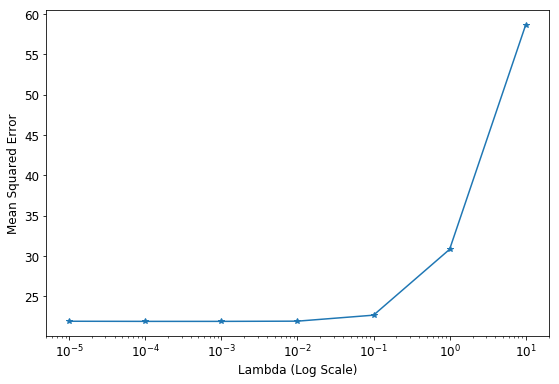

Best value of lambda is 0.001


In [8]:
sgd.cross_validate()

### Finding Weight Vector and Bias Term based on optimal lambda value and Calculating Mean Squared Error

In [239]:
sgd.fit_and_test(sgd.best_lambda)

Weight Vector: 
[[-0.91692064  1.04352607  0.06245503  0.70138332 -2.04218957  2.6519626
   0.02713936 -3.08402982  2.42769057 -1.82193846 -2.04948195  0.85598043
  -3.77273991]]
Bias Term : 
[[22.50955473]]

Mean Squared Error is 21.907870683353885


# SGDRegressor from Sklearn

In [258]:
lr = SGDRegressor(max_iter = 200, alpha = .001).fit(X_data, Y_data)
w_lr = lr.coef_
w0_lr = lr.intercept_
all_pred = np.array([])
tot_error = np.array([])
for x, y in zip(X_data, Y_data):
    pred = (np.dot(w_lr.T, x) + w0_lr)
    all_pred = np.append(all_pred, pred)
    error = (y - pred) ** 2
    tot_error = np.append(tot_error, error)
print(f'Weight Vector: \n{w_lr}\nBias Term : \n{w0_lr}\n\nMean Squared Error is {tot_error.mean()}')

Weight Vector: 
[-0.92121796  1.06853085  0.1256727   0.68340531 -2.05364887  2.65653678
  0.01865388 -3.09582918  2.6031278  -2.02707176 -2.05962863  0.85769372
 -3.74583328]
Bias Term : 
[22.53389077]

Mean Squared Error is 21.89868405283085


In [4]:
lr = LinearRegression().fit(X_data, Y_data)
w_lr = lr.coef_
w0_lr = lr.intercept_
all_pred = np.array([])
tot_error = np.array([])
for x, y in zip(X_data, Y_data):
    pred = (np.dot(w_lr.T, x) + w0_lr)
    all_pred = np.append(all_pred, pred)
    error = (y - pred) ** 2
    tot_error = np.append(tot_error, error)
print(f'Weight Vector: \n{w_lr}\nBias Term : \n{w0_lr}\n\nMean Squared Error is {tot_error.mean()}')

Weight Vector: 
[-0.92041113  1.08098058  0.14296712  0.68220346 -2.06009246  2.67064141
  0.02112063 -3.10444805  2.65878654 -2.07589814 -2.06215593  0.85664044
 -3.74867982]
Bias Term : 
22.532806324110688

Mean Squared Error is 21.897779217687496


In [305]:
class BatchSGD():
    
    def __init__(self,X_data, Y_data, w, w0, tol, iterations, lam):
        
        self.X_data = X_data
        self.Y_data = Y_data
        self.w = w
        self.w0 = w0
        self.tol = tol
        self.iterations = iterations
        self.lam = lam
        self.cross_val_values = dict()
        self.converge = dict()
        self.all_w = dict()
        self.all_w0 = dict()
    
    def cross_validate(self):
        
        iterations = self.iterations
        X_data, Y_data = self.X_data, self.Y_data
        w, w0, tol, lam = self.w, self.w0, self.tol, self.lam
        
        for lam_value in lam:


            batch_numbers = list(range(0, 501, 50))
            batch_numbers_1 = list(range(50, 501, 50))

            for j in range(1, (iterations+1)):

                if j == 1:
                    should_break = False

                if should_break:
                    break

                for a,b in zip(batch_numbers, batch_numbers_1): # this will take a batch size of 50

                    # Initializing the variables to store the total derivative per batch and also to reset the variables after every batch
                    tot_der_w, tot_der_w0 = np.ones(13).reshape(1,13), np.array([])

                    if should_break:
                        break

                    for x, y in zip(X_data[a:b], Y_data[a:b]): # taking each data point into consideration and taking its derivatives
                        
                        # calculating derivative with respect to weight vector
                        der_w = (-2 * (x * (y - (np.dot(w.T, x) + w0))) + (2* lam_value * w)).reshape(1,13)

                        # calculating derivative with respect to bias term
                        der_w0 = -2 * (y - (np.dot(w.T, x) + w0)) 


                        # stacking all the weight vector derivatives. This will have a shape of (51, 13) at the end of the loop
                        tot_der_w = np.vstack((tot_der_w, der_w))  
                        tot_der_w0 = np.append(tot_der_w0, der_w0) # appending all the bias term


                    # since we initiallised this with np.ones, so the first row would all ones and hence we exclude the first row
                    tot_der_w = tot_der_w[1:,:] 
                    avg_der_w = np.mean(tot_der_w, axis = 0) # taking average value along each column

                    avg_der_w0 = np.mean(tot_der_w0) # taking average of the bias terms

                    prev_w, prev_w0 = w, w0

                    w = w - (.1/j) * avg_der_w # updating the weight vector
                    w0 = w0 - (.1/j) * avg_der_w0 # updating the bias term

                    a = abs(w-prev_w).reshape(1,13) < (np.array([tol] * 13))

                    if a.all():
                        should_break = True
                        break
            
            tot_error = np.array([])

            for x, y in zip(X_data, Y_data):
                pred = (np.dot(w.T, x) + w0)
                error = (y - pred) ** 2
                tot_error = np.append(tot_error, error)
                self.cross_val_values[lam_value] = tot_error.mean()

            if j == iterations:
                    self.converge[lam_value] = "did not converge"
            else:
                self.converge[lam_value] = f'Took {j} iterations of the whole datset to converge'

        
        # calculating the optimal lambda based on mean squared error             
        for a,b in zip(self.cross_val_values.keys(), self.cross_val_values.values()):
            if b == min(self.cross_val_values.values()):
                self.best_lambda = a
                self.mean_squared_error = b
            print(f'{a}: {b}')
         
        # plotting lambda vs mean squared error
        fig = plt.figure(figsize = (9,6))
        ax = fig.add_subplot(1,1,1)
        plt.plot(self.cross_val_values.keys(), self.cross_val_values.values(), "-*")
        plt.xscale("log")
        plt.xlabel("Lambda (Log Scale)", fontsize = 12)
        plt.ylabel("Mean Squared Error", fontsize = 12)
        for tick_x, tick_y in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
            tick_x.label.set_fontsize(12)
            tick_y.label.set_fontsize(12)
            
        plt.show()
        
        print(f'Best value of lambda is {self.best_lambda}')
        
        
        
    def fit_and_test(self, lambd):
        
        iterations = self.iterations
        X_data, Y_data = self.X_data, self.Y_data
        w, w0, tol, lam = self.w, self.w0, self.tol, self.lam
        
        batch_numbers = list(range(0, 501, 50))
        batch_numbers_1 = list(range(50, 501, 50))

        for j in range(1, (iterations+1)):

            if j == 1:
                should_break = False

            if should_break:
                break

            for a,b in zip(batch_numbers, batch_numbers_1): # this will take a batch size of 50

                # Initializing the variables to store the total derivative per batch and also to reset the variables after every batch
                tot_der_w, tot_der_w0 = np.ones(13).reshape(1,13), np.array([])

                if should_break:
                    break

                for x, y in zip(X_data[a:b], Y_data[a:b]): # taking each data point into consideration and taking its derivatives

                    # calculating derivative with respect to weight vector
                    der_w = (-2 * (x * (y - (np.dot(w.T, x) + w0))) + (2* lambd * w)).reshape(1,13)

                    # calculating derivative with respect to bias term
                    der_w0 = -2 * (y - (np.dot(w.T, x) + w0)) 


                    # stacking all the weight vector derivatives. This will have a shape of (51, 13) at the end of the loop
                    tot_der_w = np.vstack((tot_der_w, der_w))  
                    tot_der_w0 = np.append(tot_der_w0, der_w0) # appending all the bias term


                # since we initiallised this with np.ones, so the first row would all ones and hence we exclude the first row
                tot_der_w = tot_der_w[1:,:] 
                avg_der_w = np.mean(tot_der_w, axis = 0) # taking average value along each column

                avg_der_w0 = np.mean(tot_der_w0) # taking average of the bias terms

                prev_w, prev_w0 = w, w0

                w = w - (.1/j) * avg_der_w # updating the weight vector
                w0 = w0 - (.1/j) * avg_der_w0 # updating the bias term

                a = abs(w-prev_w).reshape(1,13) < (np.array([tol] * 13))

                if a.all():
                    should_break = True
                    break

                    
            tot_error = np.array([])
            for x, y in zip(X_data, Y_data):
                pred = (np.dot(w.T, x) + w0)
                error = (y - pred) ** 2
                tot_error = np.append(tot_error, error)
                self.mean_squared_error = tot_error.mean()
    
        print(f'Weight Vector: \n{w.T}')
        print(f'Bias Term : \n{w0.T}')
        print(f'\nMean Squared Error is {self.mean_squared_error}')
        self.w = w
        self.w0 = w0



In [310]:
# Initiallising weights randomly and other parameters
w = np.random.normal(size = 13)
w0 = np.random.normal(size = 1)
lam = .001 # lambda
learning_rate = .01
iterations = 200
tol = .000001
print(w)
print(w0)

[ 0.8284362  -1.00085806  0.86666267 -0.35204558  0.85437115 -1.32236107
 -1.06797104 -1.70205529  0.99673551 -0.69777468  0.4078884  -0.44887736
 -0.50862967]
[0.92542599]


In [311]:
batch_sgd = BatchSGD(X_data, Y_data, w, w0, .0000001, 300, [.00001, .0001, .001, .01, .1, 1, 10])

1e-05: 22.05537608579311
0.0001: 21.95450813075364
0.001: 21.93567908276709
0.01: 21.943863971497798
0.1: 22.58951096467165
1: 30.709316001089668
10: 58.99375294243178


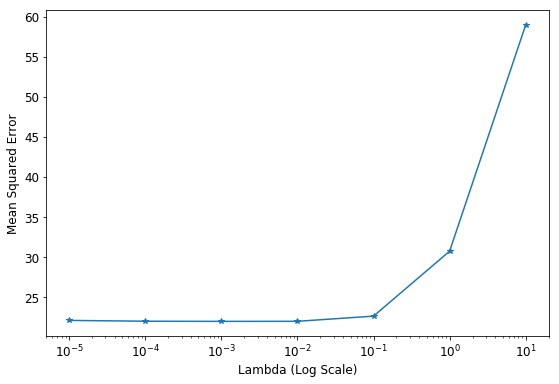

Best value of lambda is 0.001


In [312]:
batch_sgd.cross_validate()

In [313]:
batch_sgd.fit_and_test(batch_sgd.best_lambda)

Weight Vector: 
[-0.82151233  0.86627149 -0.12901287  0.70394585 -1.74251218  2.75966746
  0.05009684 -2.84146374  1.71768614 -1.18704512 -1.9353735   0.86941113
 -3.83405589]
Bias Term : 
[22.5829143]

Mean Squared Error is 22.0589203171967
